In [ ]:
from google.colab import files
files.upload()

Saving training_fix.csv to training_fix.csv


{'training_fix.csv': b';tweet;label\r\n0;warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak dipadu kretivitas jadilah warung yang menyajikan menu utama berbahan tahu ditambah menu umum lain seperti ayam semuanya selera indonesia harga cukup terjangkau jangan lewatkan tahu bletoka nya tidak kalah dengan yang asli dari tegal ;positive\r\n1;lokasi strategis di jalan sumatera bandung tempat nya nyaman terutama sofa di lantai 2 paella nya enak sangat pas dimakan dengan minum bir dingin appetiser nya juga enak enak ;positive\r\n2;betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus menetapkan beli lagi ;positive\r\n3;makanan beragam harga makanan di food stall akan ditambahkan 10 lagi di kasir suasana ramai dan perlu perhatian untuk mendapatkan parkir dan tempat duduk ;positive\r\n4;tempat unik bagus buat foto makanan enak pegawai ramah bersih dan luas wifi kencang harga stand

In [ ]:
import pandas as pd

df = pd.read_csv('/content/training_fix.csv',sep=';', header=0)

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]',' ')
df['tweet'] = df['tweet'].str.replace(r'\s+', ' ', regex=True)
df['tweet'] = df['tweet'].str.replace(r'\n', ' ', regex=True)
df.head(5)

<ipython-input-4-b9397bfd3cec>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('[^\w\s]',' ')


,tweet,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,lokasi strategis di jalan sumatera bandung tem...,positive
2,betapa bahagia nya diri ini saat unboxing pake...,positive
3,makanan beragam harga makanan di food stall ak...,positive
4,tempat unik bagus buat foto makanan enak pegaw...,positive


In [ ]:
df.drop(['Unnamed: 0'], axis=1)

In [ ]:
from collections import Counter

results = Counter()
df['tweet'].str.lower().str.split().apply(results.update)
print(len(results))

18533


In [ ]:
# preprocessing
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

max_fatures = 18533
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['tweet'].values) # -> bikin menu kata menjadi integer
X = tokenizer.texts_to_sequences(df['tweet'].values) # -> merubah kata menjadi integer
X = pad_sequences(X)

In [ ]:
X.shape

(9899, 96)

In [ ]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 32, stratify = Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7919, 96) (7919, 3)
(1980, 96) (1980, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 96, 128)           2372224   
                                                                 
 spatial_dropout1d (SpatialD  (None, 96, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 3)                 591       
                                                                 
Total params: 2,627,615
Trainable params: 2,627,615
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

7919
7919
1980
1980


In [ ]:
validation_size = 600

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]

In [ ]:
from keras.callbacks import EarlyStopping

earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min', patience=2)
history=model.fit(X_train,Y_train,epochs = 7, batch_size=256,validation_data=(X_validate,Y_validate) ,verbose=2,callbacks=[earlyStop])

Epoch 1/7
31/31 - 59s - loss: 0.9143 - accuracy: 0.5657 - val_loss: 0.6208 - val_accuracy: 0.7767 - 59s/epoch - 2s/step
Epoch 2/7
31/31 - 57s - loss: 0.4898 - accuracy: 0.8201 - val_loss: 0.3775 - val_accuracy: 0.8667 - 57s/epoch - 2s/step
Epoch 3/7
31/31 - 55s - loss: 0.3236 - accuracy: 0.8848 - val_loss: 0.3098 - val_accuracy: 0.8783 - 55s/epoch - 2s/step
Epoch 4/7
31/31 - 57s - loss: 0.2520 - accuracy: 0.9121 - val_loss: 0.3261 - val_accuracy: 0.8867 - 57s/epoch - 2s/step
Epoch 5/7
31/31 - 56s - loss: 0.1947 - accuracy: 0.9327 - val_loss: 0.2782 - val_accuracy: 0.8900 - 56s/epoch - 2s/step
Epoch 6/7
31/31 - 56s - loss: 0.1550 - accuracy: 0.9468 - val_loss: 0.3021 - val_accuracy: 0.8917 - 56s/epoch - 2s/step
Epoch 7/7
31/31 - 55s - loss: 0.1276 - accuracy: 0.9566 - val_loss: 0.2851 - val_accuracy: 0.8950 - 55s/epoch - 2s/step
Epoch 7: early stopping


In [ ]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = 256)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

In [ ]:
import numpy as np
rounded_Y_test=np.argmax(Y_test, axis=1)
rounded_Y_test[1]

0

In [ ]:
Y_predict = []
for x in X_test:
  x = np.reshape(x, (1,96))
  result = model.predict(x, batch_size=64, verbose=2)[0]
  if(np.argmax(result) == 0):
    Y_predict.append(0)
  elif (np.argmax(result) == 1):
    Y_predict.append(1)
  elif (np.argmax(result) == 2):
    Y_predict.append(2)

Y_predict

1/1 - 0s - 371ms/epoch - 371ms/step
1/1 - 0s - 48ms/epoch - 48ms/step
1/1 - 0s - 41ms/epoch - 41ms/step
1/1 - 0s - 42ms/epoch - 42ms/step
1/1 - 0s - 41ms/epoch - 41ms/step
1/1 - 0s - 42ms/epoch - 42ms/step
1/1 - 0s - 44ms/epoch - 44ms/step
1/1 - 0s - 41ms/epoch - 41ms/step
1/1 - 0s - 46ms/epoch - 46ms/step
1/1 - 0s - 43ms/epoch - 43ms/step
1/1 - 0s - 43ms/epoch - 43ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 43ms/epoch - 43ms/step
1/1 - 0s - 41ms/epoch - 41ms/step
1/1 - 0s - 42ms/epoch - 42ms/step
1/1 - 0s - 43ms/epoch - 43ms/step
1/1 - 0s - 47ms/epoch - 47ms/step
1/1 - 0s - 43ms/epoch - 43ms/step
1/1 - 0s - 41ms/epoch - 41ms/step
1/1 - 0s - 41ms/epoch - 41ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 42ms/epoch - 42ms/step
1/1 - 0s - 43ms/epoch - 43ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 44ms/epoch - 44ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 46ms/epoch - 46ms/step
1/1 - 0s - 4

[0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,


In [ ]:
from sklearn import metrics

print(metrics.classification_report(rounded_Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       472
           1       0.95      0.94      0.94       455
           2       0.91      0.89      0.90       453

    accuracy                           0.91      1380
   macro avg       0.91      0.91      0.91      1380
weighted avg       0.91      0.91      0.91      1380



In [ ]:
twt = ['halo dunia, apa kabar kamu?']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=96, dtype='int32', value=0)
print(twt)

sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("neutral")
elif (np.argmax(sentiment) == 2):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0 1582  227  109 1023  238]]
1/1 - 0s - 80ms/epoch - 80ms/step
neutral


<function matplotlib.pyplot.show(*args, **kw)>

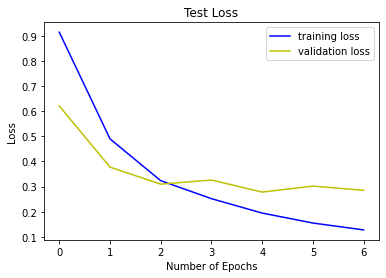

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='b', label='training loss')
plt.plot(history.history['val_loss'], color='y', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

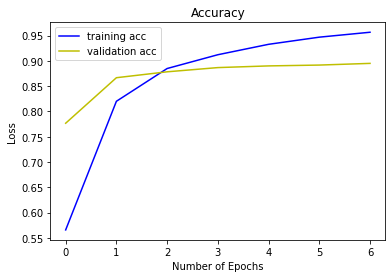

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='b', label='training acc')
plt.plot(history.history['val_accuracy'], color='y', label='validation acc')
plt.title('Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [ ]:
model.save('model_lstm.h5')

In [ ]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)